# Methodologies I : 

## Classification Module --> Evaluation Exercises


In [224]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

import warnings

warnings.filterwarnings('ignore')

#### 2). Given the matrix, find model perfomance


d_c = [ [46, 7], [13, 34] ]


-  46: True Negatives

-  7: False Positives

-  13: False Negatives

-  34: True Positives


## 3). You are working as a datascientist working for Codeup Cody Creator (C3 for short), a rubber-duck manufacturing plant. Unfortunately, some of the rubber ducks that are produced will have defects. Your team has built several models that try to predict those defects, and the data from their predictions can be found here.

###### Use the predictions dataset and pandas to help answer the following questions:

-  An internal team wants to investigate the cause of the manufacturing defects. They tell you that they want to identify as many of the ducks that have a defect as possible. 

#####   Which evaluation metric would be appropriate here? 

ANSWER: Precision Matrix
EXPLANATION: precision model bases on number of times a model predicts the +ve class. Since our +ve is the 'No Defect', our model overall precision is 68.83% compared to the baseline precision of 92.00%. Better to have good duckies classified as bad than the bad classified as good

#####   Which model would be the best fit for this use case?

ANSWER: One vs rest


-  Recently several stories in the local news have come out highlighting customers who received a rubber duck with a defect, and portraying C3 in a bad light. The PR team has decided to launch a program that gives customers with a defective duck a vacation to Hawaii. They need you to predict which ducks will have defects, but tell you the really don't want to accidentally give out a vacation package when the duck really doesn't have a defect. Which evaluation metric would be appropriate here? 


-  Which model would be the best fit for this use case?

### Prepare Phase

In [96]:
duckies = pd.read_csv('c3.csv')
duckies

,actual,model1,model2,model3
0,No Defect,No Defect,Defect,No Defect
1,No Defect,No Defect,Defect,Defect
2,No Defect,No Defect,Defect,No Defect
3,No Defect,Defect,Defect,Defect
4,No Defect,No Defect,Defect,No Defect
...,...,...,...,...
195,No Defect,No Defect,Defect,Defect
196,Defect,Defect,No Defect,No Defect
197,No Defect,No Defect,No Defect,No Defect
198,No Defect,No Defect,Defect,Defect


In [97]:
# Prepare the data

duckies.describe()

,actual,model1,model2,model3
count,200,200,200,200
unique,2,2,2,2
top,No Defect,No Defect,No Defect,No Defect
freq,184,190,110,101


In [98]:
duckies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   actual  200 non-null    object
 1   model1  200 non-null    object
 2   model2  200 non-null    object
 3   model3  200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [99]:
duckies.actual.value_counts()

No Defect    184
Defect        16
Name: actual, dtype: int64

In [100]:
duckies.model1.value_counts()

No Defect    190
Defect        10
Name: model1, dtype: int64

In [101]:
duckies.model2.value_counts()

No Defect    110
Defect        90
Name: model2, dtype: int64

In [102]:
duckies.model3.value_counts()

No Defect    101
Defect        99
Name: model3, dtype: int64

<AxesSubplot:>

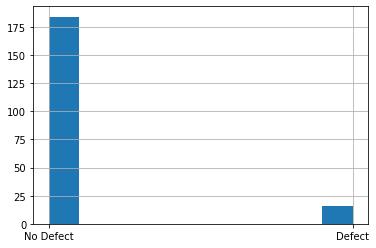

In [103]:
duckies.actual.hist()

<AxesSubplot:>

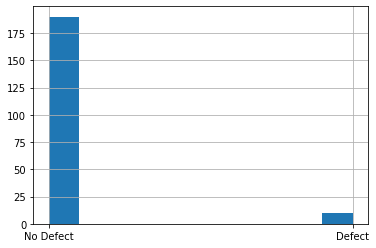

In [104]:
duckies.model1.hist()

<AxesSubplot:>

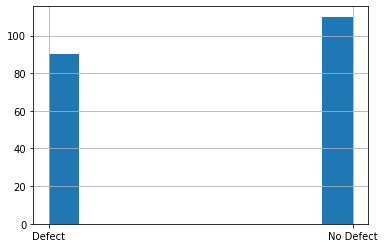

In [105]:
duckies.model2.hist()

<AxesSubplot:>

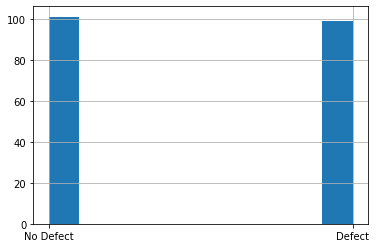

In [106]:
duckies.model3.hist()

# Key observations:

-  Actual and model 1 have least amount of defect. 
-  Model 2 and model3 have bigger portions of defect duckies. 
  


### Actual VS Model1 Confusion Matrix

In [107]:
confusion_matrix(duckies.actual, duckies.model1, labels =('No Defect', 'Defect'))


array([[182,   2],
       [  8,   8]])

In [108]:
pd.crosstab(duckies.actual, duckies.model1)

model1,Defect,No Defect
actual,,
Defect,8,8
No Defect,2,182


## Actual VS Model2 Confusion Matrix & Cross - tabulations

In [109]:

confusion_matrix(duckies.actual, duckies.model2, labels =('No Defect', 'Defect'))


array([[103,  81],
       [  7,   9]])

In [110]:
pd.crosstab(duckies.actual, duckies.model2)

model2,Defect,No Defect
actual,,
Defect,9,7
No Defect,81,103


### Actual VS Model3 Confusion Matrix

In [111]:
confusion_matrix(duckies.actual, duckies.model3, labels =('No Defect', 'Defect'))


array([[98, 86],
       [ 3, 13]])

In [112]:
pd.crosstab(duckies.actual, duckies.model3)

model3,Defect,No Defect
actual,,
Defect,13,3
No Defect,86,98


## Baseline Model Prediction: 

In [127]:
# 'No Defects' because predicts the most common class each time

duckies['baseline_prediction'] = 'No Defect'

### Duckies Model I

In [128]:
# Model Accuracy

model_accuracy = (duckies.model1 == duckies.actual).mean()
print(f'\tModel I accuracy: {model_accuracy:.2%}')

	Model accuracy: 95.00%


In [129]:
# Baseline Accuracy

baseline_accuracy = (duckies.baseline_prediction == duckies.actual).mean()
print(f'\tbaseline accuracy: {baseline_accuracy:.2%}')

	baseline accuracy: 92.00%


In [130]:
# Subset 

subset = duckies[duckies.actual == 'No Defect']
model_recall =(subset.model1 == subset.actual).mean()
baseline_recall = (subset.baseline_prediction == subset.actual).mean()

print(f'\tModel recall: {model_recall:.2%}')
print(f'\tBaseline recall: {baseline_recall:.2%}')


	Model recall: 98.91%
	Baseline recall: 100.00%


In [131]:
# Precision

subset = duckies[duckies.model1 == 'No Defect']
model_precision = (subset.model1 == subset.actual).mean()

subset = duckies[duckies.baseline_prediction == 'No Defect']
baseline_precision = (subset.baseline_prediction == subset.actual).mean()


print(f'\tModel precision: {model_precision:.2%}')
print(f'\tBaseline precision: {baseline_precision:.2%}')


	Model precision: 95.79%
	Baseline precision: 92.00%


In [143]:
print('MODEL I: Accuracy | Recall | Precision')
print()
print(f'\tModel I accuracy: {model_accuracy:.2%}')
print(f'\tbaseline accuracy: {baseline_accuracy:.2%}')

print('--------------------------------------')

print(f'\tModel I recall: {model_recall:.2%}')
print(f'\tBaseline recall: {baseline_recall:.2%}')

print('--------------------------------------')
print(f'\tModel I precision: {model_precision:.2%}')
print(f'\tBaseline precision: {baseline_precision:.2%}')

MODEL I: Accuracy | Recall | Precision

	Model I accuracy: 95.00%
	baseline accuracy: 92.00%
--------------------------------------
	Model I recall: 98.91%
	Baseline recall: 100.00%
--------------------------------------
	Model I precision: 95.79%
	Baseline precision: 92.00%


### Duckies Model II

In [133]:
confusion_matrix(duckies.actual, duckies.model2, labels =('No Defect', 'Defect'))


array([[103,  81],
       [  7,   9]])

In [134]:
pd.crosstab(duckies.actual, duckies.model2)

model2,Defect,No Defect
actual,,
Defect,9,7
No Defect,81,103


In [135]:
model_accuracy2 = (duckies.model2 == duckies.actual).mean()
baseline_accuracy2 = (duckies.baseline_prediction == duckies.actual).mean()

subset2 = duckies[duckies.actual == 'No Defect']
model_recall2 =(subset.model2 == subset.actual).mean()
baseline_recall2 = (subset.baseline_prediction == subset.actual).mean()

subset2 = duckies[duckies.model2 == 'No Defect']
model_precision2 = (subset.model2 == subset.actual).mean()

subset2 = duckies[duckies.baseline_prediction == 'No Defect']
baseline_precision2 = (subset.baseline_prediction == subset.actual).mean()

In [142]:
print()
print('MODEL II: Accuracy | Recall | Precision')
print()
print(f'\tModel II accuracy: {model_accuracy2:.2%}')
print(f'\tbaseline accuracy: {baseline_accuracy2:.2%}')

print('--------------------------------------')

print(f'\tModel II recall: {model_recall2:.2%}')
print(f'\tBaseline recall: {baseline_recall2:.2%}')

print('--------------------------------------')
print(f'\tModel II precision: {model_precision2:.2%}')
print(f'\tBaseline precision: {baseline_precision2:.2%}')


MODEL II: Accuracy | Recall | Precision

	Model II accuracy: 56.00%
	baseline accuracy: 92.00%
--------------------------------------
	Model II recall: 56.00%
	Baseline recall: 92.00%
--------------------------------------
	Model II precision: 56.00%
	Baseline precision: 92.00%


### Duckies Model III



In [137]:
confusion_matrix(duckies.actual, duckies.model3, labels =('No Defect', 'Defect'))


array([[98, 86],
       [ 3, 13]])

In [138]:
pd.crosstab(duckies.actual, duckies.model3)

model3,Defect,No Defect
actual,,
Defect,13,3
No Defect,86,98


In [139]:
model_accuracy3 = (duckies.model3 == duckies.actual).mean()
baseline_accuracy3 = (duckies.baseline_prediction == duckies.actual).mean()

subset3 = duckies[duckies.actual == 'No Defect']
model_recall3 =(subset.model3 == subset.actual).mean()
baseline_recall3 = (subset.baseline_prediction == subset.actual).mean()

subset3 = duckies[duckies.model3 == 'No Defect']
model_precision3 = (subset.model3 == subset.actual).mean()

subset3 = duckies[duckies.baseline_prediction == 'No Defect']
baseline_precision3 = (subset.baseline_prediction == subset.actual).mean()

In [145]:
print()
print('MODEL III: Accuracy | Recall | Precision')
print()
print(f'\tModel III accuracy: {model_accuracy3:.2%}')
print(f'\tbaseline accuracy: {baseline_accuracy3:.2%}')

print('--------------------------------------')

print(f'\tModel III recall: {model_recall3:.2%}')
print(f'\tBaseline recall: {baseline_recall3:.2%}')

print('--------------------------------------')
print(f'\tModel III precision: {model_precision3:.2%}')
print(f'\tBaseline precision: {baseline_precision3:.2%}')


MODEL III: Accuracy | Recall | Precision

	Model III accuracy: 55.50%
	baseline accuracy: 92.00%
--------------------------------------
	Model III recall: 55.50%
	Baseline recall: 92.00%
--------------------------------------
	Model III precision: 55.50%
	Baseline precision: 92.00%


## Overall Average Performance metrics 




In [150]:
# Precision Model mean

overall_precision = (model_accuracy + model_precision2 + model_precision3) / 3
print(f'\tBaseline precision: {baseline_precision:.2%}')
print()
print(f'\tOverall Mean Precision for 3 models: {overall_precision:.2%}')


	Baseline precision: 92.00%

	Overall Mean Precision for 3 models: 68.83%


### Which evaluation metric would be appropriate here? 

-  Precision: 

### Which model would be the best fit for this use case?

### An internal team wants to investigate the cause of the manufacturing defects. They tell you that they want to identify as many of the ducks that have a defect as possible. 
-  Which evaluation metric would be appropriate here? 

#### ANSWER: Precision Matrix
EXPLANATION: precision model bases on number of times a model predicts the +ve class. Since our +ve is the 'No Defect', our model overall precision is 68.83% compared to the baseline precision of 92.00%. Better to have good duckies classified as bad than the bad classified as good


-  Which model would be the best fit for this use case?

ANSWER: Model I with 95% precision

### Recently several stories in the local news have come out highlighting customers who received a rubber duck with a defect, and portraying C3 in a bad light. The PR team has decided to launch a program that gives customers with a defective duck a vacation to Hawaii. They need you to predict which ducks will have defects, but tell you the really don't want to accidentally give out a vacation package when the duck really doesn't have a defect. Which evaluation metric would be appropriate here?

##### ANSWER: Recall. 

##### EXPLANATION: The false negatives are costly. Hawaii trips are expensive and we cannot afford to make an error giving a reward to custimers that received good duckies and miss those that received bad duckies

### 4). You are working as a data scientist for Gives You Paws ™, a subscription based service that shows you cute pictures of dogs or cats (or both for an additional fee).

### At Gives You Paws, anyone can upload pictures of their cats or dogs. The photos are then put through a two step process. First an automated algorithm tags pictures as either a cat or a dog (Phase I). Next, the photos that have been initially identified are put through another round of review, possibly with some human oversight, before being presented to the users (Phase II).

### Several models have already been developed with the data, and you can find their results here.

#### Given this dataset, use pandas to create a baseline model (i.e. a model that just predicts the most common class) and answer the following questions:


a). In terms of accuracy, how do the various models compare to the baseline model? Are any of the models better than the baseline?


b). Suppose you are working on a team that solely deals with dog pictures. Which of these models would you recomend for Phase I? For Phase II?

c). Suppose you are working on a team that solely deals with cat pictures. Which of these models would you recomend for Phase I? For Phase II?




In [154]:
paws = pd.read_csv('gives_you_paws.csv')
paws.head()

,actual,model1,model2,model3,model4
0,cat,cat,dog,cat,dog
1,dog,dog,cat,cat,dog
2,dog,cat,cat,cat,dog
3,dog,dog,dog,cat,dog
4,cat,cat,cat,dog,dog


In [156]:
paws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   actual  5000 non-null   object
 1   model1  5000 non-null   object
 2   model2  5000 non-null   object
 3   model3  5000 non-null   object
 4   model4  5000 non-null   object
dtypes: object(5)
memory usage: 195.4+ KB


In [157]:
paws.shape

(5000, 5)

In [164]:
paws.actual.value_counts()

dog    3254
cat    1746
Name: actual, dtype: int64

In [165]:
paws.model1.value_counts()

dog    2937
cat    2063
Name: model1, dtype: int64

In [166]:
paws.model2.value_counts()

cat    3212
dog    1788
Name: model2, dtype: int64

In [167]:
paws.model3.value_counts()

dog    2508
cat    2492
Name: model3, dtype: int64

In [168]:
paws.model4.value_counts()

dog    4253
cat     747
Name: model4, dtype: int64

In [181]:
pd.crosstab(paws.actual, paws.model1)

model1,cat,dog
actual,,
cat,1423,323
dog,640,2614


In [183]:
pd.crosstab(paws.actual, paws.model2)

model2,cat,dog
actual,,
cat,1555,191
dog,1657,1597


In [184]:
pd.crosstab(paws.actual, paws.model3)

model3,cat,dog
actual,,
cat,893,853
dog,1599,1655


In [185]:
pd.crosstab(paws.actual, paws.model4)

model4,cat,dog
actual,,
cat,603,1143
dog,144,3110


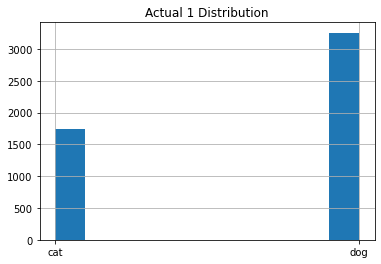

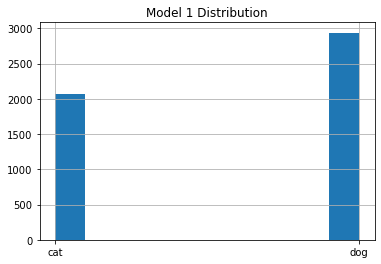

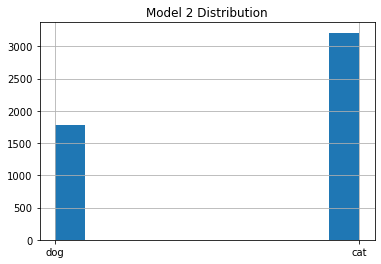

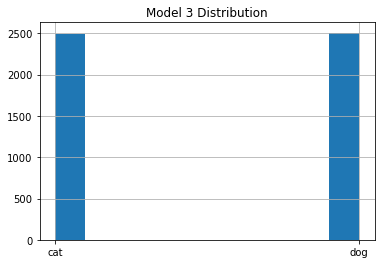

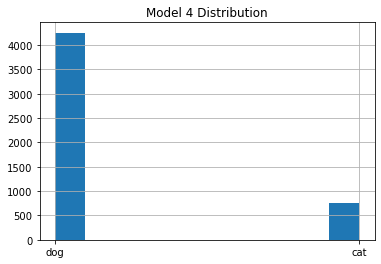

In [197]:
plt.title('Actual 1 Distribution')
paws.actual.hist()
plt.show()
plt.title('Model 1 Distribution')
paws.model1.hist()
plt.show()
plt.title('Model 2 Distribution')
paws.model2.hist()
plt.show()
plt.title('Model 3 Distribution')
paws.model3.hist()
plt.show()
plt.title('Model 4 Distribution')
paws.model4.hist()
plt.show()


## Baseline Model

In [201]:
# Dog pic is the most common

paws['baseline_paws_prediction'] = 'dog'

### a). In terms of accuracy, how do the various models compare to the baseline model? Are any of the models better than the baseline?

In [209]:
paw_model1_accuracy = (paws.actual == paws.model1).mean()
paw_model2_accuracy = (paws.actual == paws.model2).mean()
paw_model3_accuracy = (paws.actual == paws.model3).mean()
paw_model4_accuracy = (paws.actual == paws.model4).mean()

paw_baseline_accuracy = (paws.baseline_paws_prediction == paws.actual).mean()

In [216]:
print()
print('Paw Accuracy Models')
print()
print(f'\tPaw Model I: Accuracy: {paw_model1_accuracy:.2%}')
print()
print(f'\tPaw Model II: Accuracy: {paw_model2_accuracy:.2%}')
print()
print(f'\tPaw Model III: Accuracy: {paw_model3_accuracy:.2%}')
print()
print(f'\tPaw Model IV: Accuracy: {paw_model4_accuracy:.2%}')
print('-------------------------------------------------')
print(f'\tPaw baseline Accuracy: {paw_baseline_accuracy:.2%}')
print()


Paw Accuracy Models

	Paw Model I: Accuracy: 80.74%

	Paw Model II: Accuracy: 63.04%

	Paw Model III: Accuracy: 50.96%

	Paw Model IV: Accuracy: 74.26%
-------------------------------------------------
	Paw baseline Accuracy: 65.08%



### a). EXPLANATION: 

BaseLine accuracy = 65.08%

    Model 1 Accuracy:  80.74% 
    Model 2 Accuracy:  63.04%
    Model 3 Accuracy:  50.96% (Below baseline)
    Model 4 Accuracy:  74.26%





### b). Suppose you are working on a team that solely deals with dog pictures. 

-   Which of these models would you recomend for Phase I?

    -  ANSWER: Model 1 since the dog is our baseline and has the highest accuracy 80.74%

-   For Phase II?

    -  ANSWER: Phase II: Second highest is Model 4 at 74.26%

### c). Suppose you are working on a team that solely deals with cat pictures. Which of these models would you recomend for Phase I? For Phase II?

In [221]:
paws['cats_baseline_accuracy'] = 'cat'

In [222]:
print()
print('Paw Accuracy Models')
print()
print(f'\tPaw Model I: Accuracy: {paw_model1_accuracy:.2%}')
print()
print(f'\tPaw Model II: Accuracy: {paw_model2_accuracy:.2%}')
print()
print(f'\tPaw Model III: Accuracy: {paw_model3_accuracy:.2%}')
print()
print(f'\tPaw Model IV: Accuracy: {paw_model4_accuracy:.2%}')
print('-------------------------------------------------')
print(f'\tCats baseline Prediction: {cats_baseline_prediction:.2%}')
print()


Paw Accuracy Models

	Paw Model I: Accuracy: 80.74%

	Paw Model II: Accuracy: 63.04%

	Paw Model III: Accuracy: 50.96%

	Paw Model IV: Accuracy: 74.26%
-------------------------------------------------


NameError: name 'cats_baseline_prediction' is not defined

## 5). Follow the links below to read the documentation about each function, then apply those functions to the data from the previous problem.

-  sklearn.metrics.accuracy_score
-  sklearn.metrics.precision_score
-  sklearn.metrics.recall_score
-  sklearn.metrics.classification_report



## Model I

In [237]:


model1 = classification_report(paws.actual, paws.model1, output_dict = True)
model1

{'cat': {'precision': 0.6897721764420747,
  'recall': 0.8150057273768614,
  'f1-score': 0.7471777369388292,
  'support': 1746},
 'dog': {'precision': 0.8900238338440586,
  'recall': 0.803318992009834,
  'f1-score': 0.8444516233241802,
  'support': 3254},
 'accuracy': 0.8074,
 'macro avg': {'precision': 0.7898980051430666,
  'recall': 0.8091623596933477,
  'f1-score': 0.7958146801315047,
  'support': 5000},
 'weighted avg': {'precision': 0.8200959550792857,
  'recall': 0.8074,
  'f1-score': 0.8104835821984157,
  'support': 5000}}

In [240]:
paws_df_model1 = pd.DataFrame(model1)
paws_df_model1

,cat,dog,accuracy,macro avg,weighted avg
precision,0.689772,0.890024,0.8074,0.789898,0.820096
recall,0.815006,0.803319,0.8074,0.809162,0.807400
f1-score,0.747178,0.844452,0.8074,0.795815,0.810484
support,1746.000000,3254.000000,0.8074,5000.000000,5000.000000


## Model II

In [231]:

model2 = classification_report(paws.actual, paws.model2, output_dict = True)
model2

{'cat': {'precision': 0.4841220423412204,
  'recall': 0.8906071019473081,
  'f1-score': 0.627269060104881,
  'support': 1746},
 'dog': {'precision': 0.8931767337807607,
  'recall': 0.49078057775046097,
  'f1-score': 0.6334787782625942,
  'support': 3254},
 'accuracy': 0.6304,
 'macro avg': {'precision': 0.6886493880609905,
  'recall': 0.6906938398488845,
  'f1-score': 0.6303739191837376,
  'support': 5000},
 'weighted avg': {'precision': 0.7503348355300732,
  'recall': 0.6304,
  'f1-score': 0.6313103446819207,
  'support': 5000}}

In [242]:
paws_df_model2 = pd.DataFrame(model2)
paws_df_model2

,cat,dog,accuracy,macro avg,weighted avg
precision,0.484122,0.893177,0.6304,0.688649,0.750335
recall,0.890607,0.490781,0.6304,0.690694,0.630400
f1-score,0.627269,0.633479,0.6304,0.630374,0.631310
support,1746.000000,3254.000000,0.6304,5000.000000,5000.000000


### Model III

In [245]:
model3 = classification_report(paws.actual, paws.model3, output_dict = True)
model3

{'cat': {'precision': 0.358346709470305,
  'recall': 0.5114547537227949,
  'f1-score': 0.4214252005663049,
  'support': 1746},
 'dog': {'precision': 0.6598883572567783,
  'recall': 0.5086047940995697,
  'f1-score': 0.5744533148212425,
  'support': 3254},
 'accuracy': 0.5096,
 'macro avg': {'precision': 0.5091175333635416,
  'recall': 0.5100297739111823,
  'f1-score': 0.4979392576937737,
  'support': 5000},
 'weighted avg': {'precision': 0.5545900138497418,
  'recall': 0.5095999999999999,
  'f1-score': 0.5210158973234182,
  'support': 5000}}

In [247]:
paws_df_model3 = pd.DataFrame(model3)
paws_df_model3

,cat,dog,accuracy,macro avg,weighted avg
precision,0.358347,0.659888,0.5096,0.509118,0.554590
recall,0.511455,0.508605,0.5096,0.510030,0.509600
f1-score,0.421425,0.574453,0.5096,0.497939,0.521016
support,1746.000000,3254.000000,0.5096,5000.000000,5000.000000


In [248]:
model4 = classification_report(paws.actual, paws.model4, output_dict = True)
model4

{'cat': {'precision': 0.8072289156626506,
  'recall': 0.34536082474226804,
  'f1-score': 0.4837545126353791,
  'support': 1746},
 'dog': {'precision': 0.7312485304490948,
  'recall': 0.9557467732022127,
  'f1-score': 0.8285600106567205,
  'support': 3254},
 'accuracy': 0.7426,
 'macro avg': {'precision': 0.7692387230558727,
  'recall': 0.6505537989722403,
  'f1-score': 0.6561572616460498,
  'support': 5000},
 'weighted avg': {'precision': 0.7577808809656685,
  'recall': 0.7426,
  'f1-score': 0.7081539307476681,
  'support': 5000}}

In [249]:
paws_df_model4 = pd.DataFrame(model4)
paws_df_model4

,cat,dog,accuracy,macro avg,weighted avg
precision,0.807229,0.731249,0.7426,0.769239,0.757781
recall,0.345361,0.955747,0.7426,0.650554,0.742600
f1-score,0.483755,0.828560,0.7426,0.656157,0.708154
support,1746.000000,3254.000000,0.7426,5000.000000,5000.000000
